#### Note
* Read in weather data using an API for random cities around the world. 
* Plot out 4 graphs of those cities.

    Temperature (F) vs. Latitude
    
    Humidity (%) vs. Latitude
    
    Cloudiness (%) vs. Latitude
    
    Wind Speed (mph) vs. Latitude

In [1]:
# pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
 
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# For testing 
# del cities[11:-1]
# len(cities)

In [5]:
# Initial URL with API key included
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_name = []
clouds_all = []
country = []
dt = []
humidity = []
temp_max = []
lat = []
lon = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        clouds_all.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        dt.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        temp_max.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        #city_record = response["name"]
        #print(f"Processing Record {record} | {city_record}")
        print(f"Processing Record {record} | {city}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | kautokeino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=kautokeino
Processing Record 2 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=hithadhoo
Processing Record 3 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=puerto ayora
Processing Record 4 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=san patricio
Processing Record 5 | luis moya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=luis moya
Processing Record 6 | santiago de cao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=santiago de cao
Processing Record 7 | bluff
http://api.openweat

Processing Record 56 | ogulin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=ogulin
Processing Record 57 | long branch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=long branch
Processing Record 58 | severodvinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=severodvinsk
Processing Record 59 | maturin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=maturin
Processing Record 60 | kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=kenai
Processing Record 61 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=hermanus
Processing Record 62 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=a

Processing Record 112 | samarinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=samarinda
Processing Record 113 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=biak
Processing Record 114 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=luderitz
City not found. Skipping...
Processing Record 115 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=coquimbo
City not found. Skipping...
Processing Record 116 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=pevek
Processing Record 117 | eatonton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=eatonton
Processing Record 118 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Im

City not found. Skipping...
City not found. Skipping...
Processing Record 168 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=khatanga
Processing Record 169 | aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=aripuana
Processing Record 170 | kaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=kaka
Processing Record 171 | sivas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=sivas
Processing Record 172 | kurovskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=kurovskoye
Processing Record 173 | mulege
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=mulege
Processing Record 174 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 223 | kiomboi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=kiomboi
Processing Record 224 | micheweni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=micheweni
Processing Record 225 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=itarema
Processing Record 226 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=grand gaube
Processing Record 227 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=atuona
Processing Record 228 | faisalabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=faisalabad
Processing Record 229 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587

Processing Record 279 | karasjok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=karasjok
Processing Record 280 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=egvekinot
Processing Record 281 | lvovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=lvovskiy
Processing Record 282 | noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=noumea
Processing Record 283 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=ponta do sol
City not found. Skipping...
Processing Record 284 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=port hedland
Processing Record 285 | nurota
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 334 | salinas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=salinas
Processing Record 335 | quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=quelimane
Processing Record 336 | palaikastron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=palaikastron
Processing Record 337 | nishiwaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=nishiwaki
Processing Record 338 | anloga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=anloga
Processing Record 339 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=sao jose da coroa grande
Processing Record 340 | igrim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 389 | mandera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=mandera
Processing Record 390 | maputo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=maputo
Processing Record 391 | haapiti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=haapiti
Processing Record 392 | ingham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=ingham
City not found. Skipping...
Processing Record 393 | jawhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=jawhar
Processing Record 394 | frontera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=frontera
Processing Record 395 | kanevskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2

Processing Record 445 | muskogee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=muskogee
Processing Record 446 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=paamiut
Processing Record 447 | zyryanovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=zyryanovsk
Processing Record 448 | aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=aswan
Processing Record 449 | alugan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=alugan
Processing Record 450 | arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=arlit
Processing Record 451 | antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=antof

Processing Record 501 | makurdi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=makurdi
Processing Record 502 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=belaya gora
Processing Record 503 | baraboo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=baraboo
Processing Record 504 | polis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=polis
Processing Record 505 | fallon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=fallon
Processing Record 506 | santo antonio do ica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89ee2e012538587a0eadce&q=santo antonio do ica
Processing Record 507 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9de96d4bcd89e

In [6]:
# Create  a dictoinary to contain all of the data we just got from the API
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":clouds_all, 
    "Country":country,
    "Date":dt, 
    "Humidity": humidity, 
    "Max Temp": temp_max,
    "Wind Speed":wind_speed,
    "Lat":lat, 
    "Lng":lon,
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,Lat,Lng
0,Kautokeino,71,NO,1577642706,87,25.32,4.50,69.01,23.04
1,Hithadhoo,85,MV,1577642707,76,82.94,6.24,-0.60,73.08
2,Puerto Ayora,75,EC,1577642709,69,80.60,6.93,-0.74,-90.35
3,San Patricio,0,PY,1577642710,23,104.72,3.87,-26.98,-56.83
4,Luis Moya,90,MX,1577642711,76,51.80,17.22,22.43,-102.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Max Temp

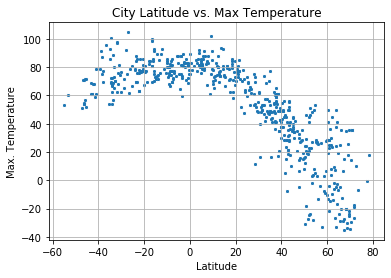

In [8]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="x", s=5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

### Latitude vs. Humidity

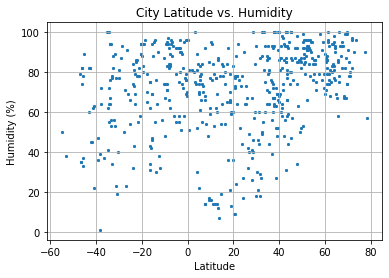

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="x", s=5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness

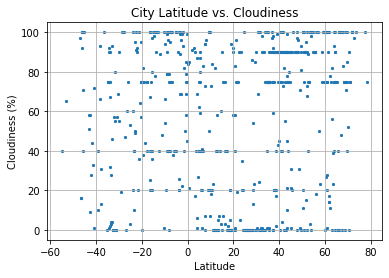

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="x", s=5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

### Latitude vs. Wind

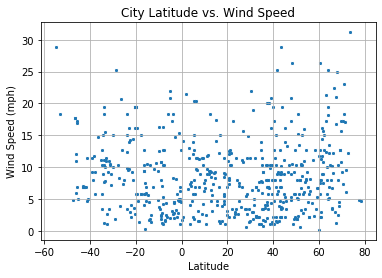

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="x", s=5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()